# Feature Selection and Model Validation

In [62]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, metrics, feature_selection
from sklearn.preprocessing import PolynomialFeatures

# More on Statsmodels formula notation: http://statsmodels.sourceforge.net/devel/example_formulas.html

## Understanding Multiple Regression

In Ordinary Least Squares Regression with a single variable we described the relationship between the predictor and the response with a straight line. In the case of multiple regression we extend this idea by fitting a $p$-dimensional hyperplane to our $p$ predictors.

We can show this for two predictor variables in a three dimensional plot. In the following example we will use the advertising dataset which consists of the *sales* of products and their advertising budget in three different media *TV*, *radio*, *newspaper*.

In [127]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


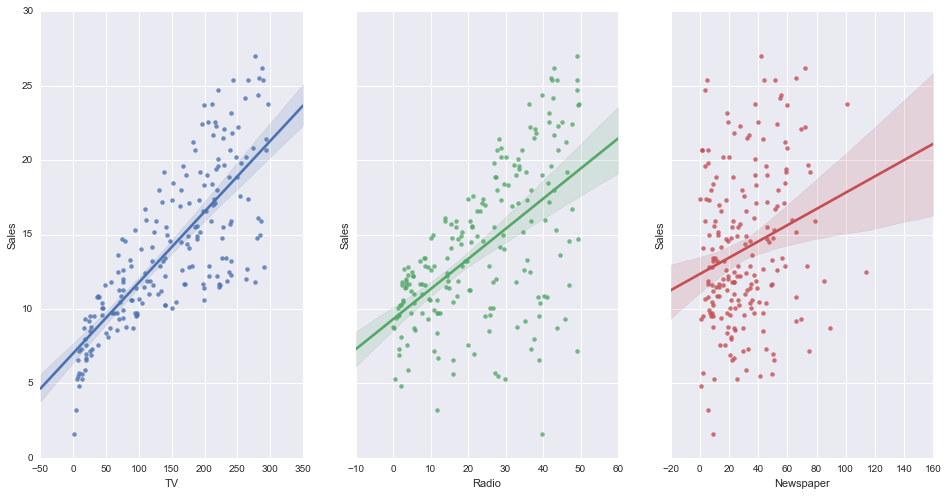

In [55]:
# We can plot multiple regressions using plt.subplots
# https://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 8))
sns.regplot('TV', 'Sales', data, ax=axs[0])
sns.regplot('Radio', 'Sales', data, ax=axs[1])
sns.regplot('Newspaper', 'Sales', data, ax=axs[2]);

****Key question: From previous classes we know that 'TV' and 'Radio' are the strongest predictors of Sales. But given a dataset with a large number of features, how do we determine the features that best describe our model?****

*Hint: We've seen this before both with Statsmodels and SKLearn*

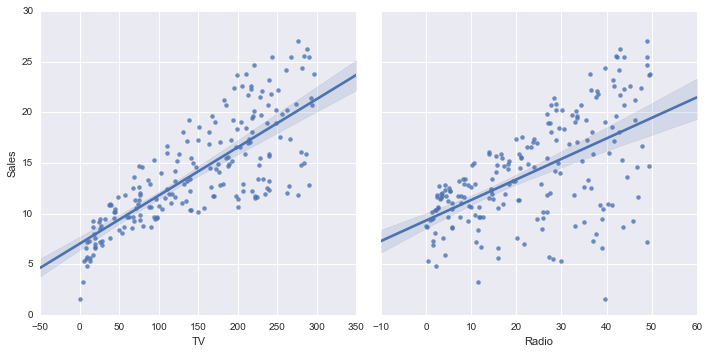

In [56]:
sns.pairplot(data, x_vars=["TV", "Radio"], y_vars=["Sales"], size=5, aspect=1, kind="reg");

The multiple regression model describes the response as a weighted sum of the predictors:

$Sales = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio$

This model can be visualized as a 2-d plane in 3-d space

![](https://d1pqsl2386xqi9.cloudfront.net/images/advertisement_3d.png)

The plot above shows data points above the hyperplane in white and points below the hyperplane in black. The color of the plane is determined by the corresonding predicted *Sales* values (blue = low, red = high). The Python code to generate the 3-d plot can be found in the [appendix](#appendix).

Just as with the single variable case, calling ``est.summary`` will give us detailed information about the model fit. You can find a description of each of the fields in the tables below in the previous blog post [here](http://www.datarobot.com/blog/ordinary-least-squares-in-python/).

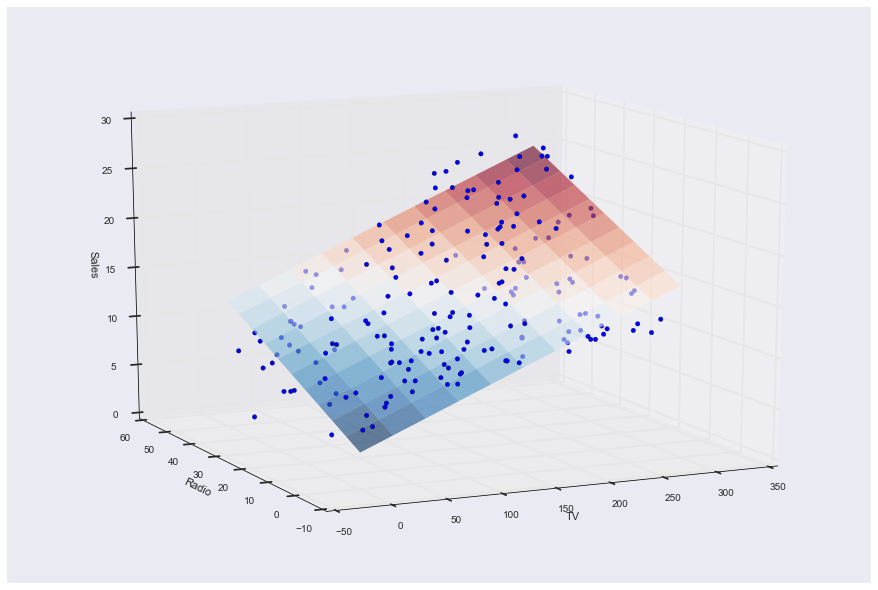

In [60]:
from mpl_toolkits.mplot3d import Axes3D

X = data[['TV', 'Radio']]
y = data['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales');

In [149]:
# Shuffle the dataframe to ensure ordering is random
shuffled_data = data.reindex(np.random.permutation(data.index))

# We'll keep 2/3 of our data, so let's find that index
split_idx = int(0.666 * len(data))

data_train = shuffled_data.iloc[:split_idx]
data_test = shuffled_data.iloc[split_idx:]

X_train = data_train[['TV', 'Radio']]
y_train = data_train['Sales']

X_test = data_test[['TV', 'Radio']]
y_test = data_test['Sales']

# Make sure we didn't miss anything
print len(data_train) + len(data_test) == len(data)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

print model.score(X_train, y_train)
print model.score(X_test, y_test)

True
0.903436157712
0.874373271545


In [134]:
len(X_test)
len(X_train)

133

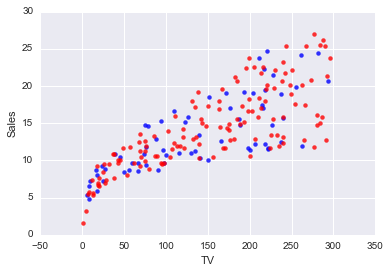

In [155]:
sns.regplot(x=X_test['TV'], y=y_test, color="blue", fit_reg=False);
sns.regplot(x=X_train['TV'], y=y_train, color="red", fit_reg=False);

sns.regplot?

(20, 2)


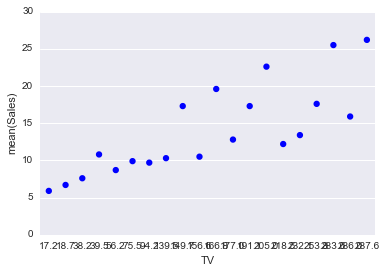

In [129]:

sns.pointplot(x=X_test['TV'], y=y_test, linestyles='', markers='.', color="blue");

print X_test.shape

In [83]:
poly = PolynomialFeatures(2)

print X.shape
print X.columns

X_ = X[['TV']]

x_axis = np.linspace(-50, 350, 1000)
X_poly = poly.fit_transform(X_)
X_axis_poly = poly.fit_transform(x_axis)

print X_axis_poly.shape
print X_poly.shape

model = linear_model.LinearRegression()

model.fit(X_poly, y)

model.score(X_poly, y)

x_axis = np.linspace(-50, 350, 1000)

poly_fit = model.predict([1])
                                            
                                            

(200, 3)
Index([u'const', u'TV', u'Radio'], dtype='object')


/Users/Aerlinger/.pyenv/versions/2.7.11/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Aerlinger/.pyenv/versions/2.7.11/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(1, 501501)
(200, 3)


/Users/Aerlinger/.pyenv/versions/2.7.11/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: shapes (1,1) and (3,) not aligned: 1 (dim 1) != 3 (dim 0)